# House Prices Predicting

In [1]:
from IPython.display import display
pd.options.display.max_columns = None

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from scipy import stats
from scipy.stats import skew,norm

import statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor


### 데이터 불러오기 및 정리

In [2]:
# 데이터 불러오기
df_origin = pd.read_csv('train.csv')

In [3]:
# 컬럼 확인
df_origin.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
len(df_origin.columns)

81

In [10]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
# 분석에 필요없는 컬럼 'Id' 제외 및 타겟 변수 'SalePrice' 분리
df = df_origin.drop(['Id','SalePrice'], axis=1)
y = df_origin['SalePrice']

In [19]:
# 트레인셋 & 테스트셋 으로 분리
df_train, df_test, y_train, y_test = train_test_split(df, y , train_size= 0.7, test_size = 0.3)

In [20]:
print(len(df_train),len(df_test))

1021 438


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 869 to 455
Data columns (total 79 columns):
MSSubClass       1021 non-null int64
MSZoning         1021 non-null object
LotFrontage      838 non-null float64
LotArea          1021 non-null int64
Street           1021 non-null object
Alley            64 non-null object
LotShape         1021 non-null object
LandContour      1021 non-null object
Utilities        1021 non-null object
LotConfig        1021 non-null object
LandSlope        1021 non-null object
Neighborhood     1021 non-null object
Condition1       1021 non-null object
Condition2       1021 non-null object
BldgType         1021 non-null object
HouseStyle       1021 non-null object
OverallQual      1021 non-null int64
OverallCond      1021 non-null int64
YearBuilt        1021 non-null int64
YearRemodAdd     1021 non-null int64
RoofStyle        1021 non-null object
RoofMatl         1021 non-null object
Exterior1st      1021 non-null object
Exterior2nd      1021 non-

In [23]:
# 예측값인 'SalePrice' 컬럼 내역 확인
y_train.describe()

count      1021.000000
mean     180352.872674
std       75226.573674
min       34900.000000
25%      130500.000000
50%      164990.000000
75%      215000.000000
max      625000.000000
Name: SalePrice, dtype: float64

/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to NanumBarunGothic.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to NanumBarunGothic.
  (prop.get_family(), self.defaultFamily[fontext]))


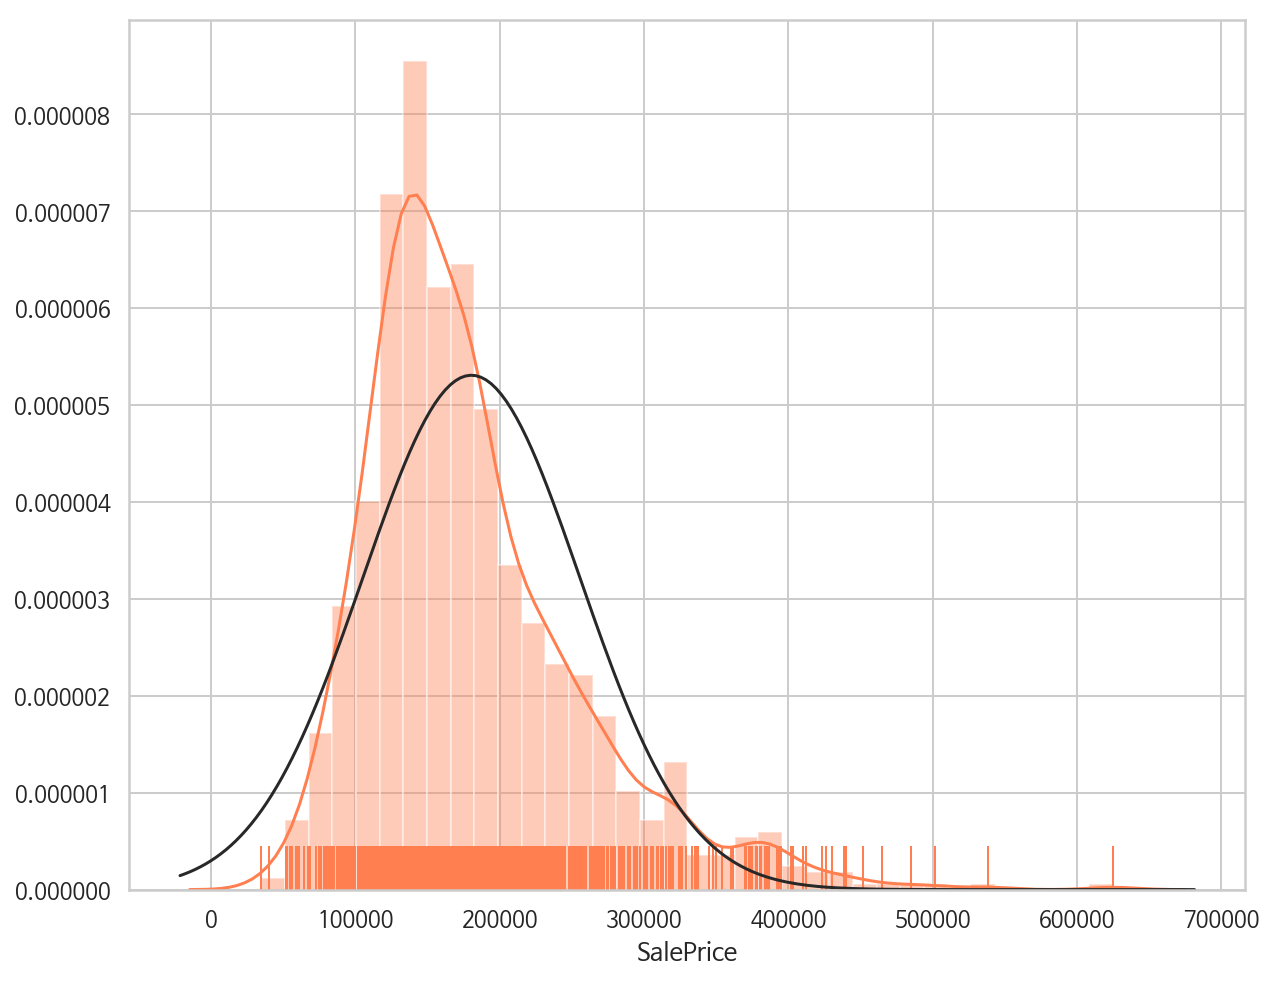

In [24]:
plt.figure(figsize=(10,8))
sns.distplot(y_train, color='coral', fit=norm, rug=True)

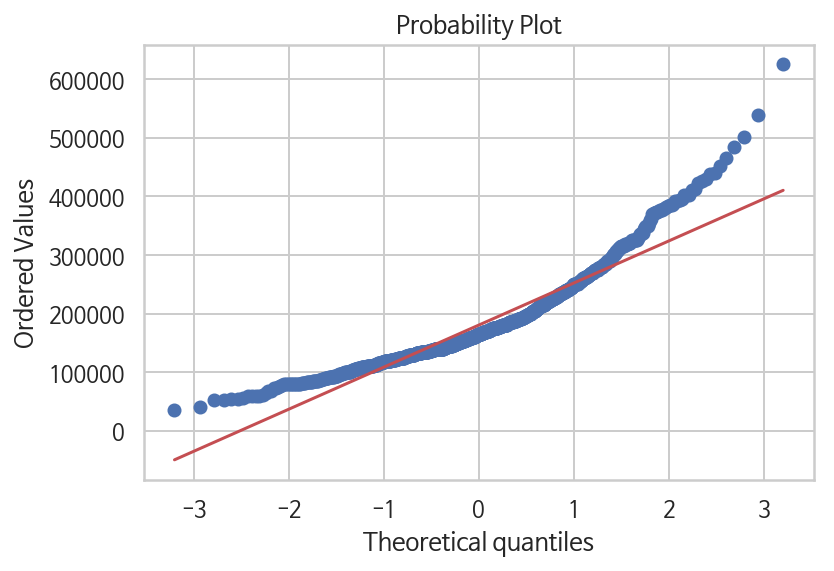

In [25]:
# normal distribution check
res = stats.probplot(y_train, plot=plt)

### 데이터 상관관계

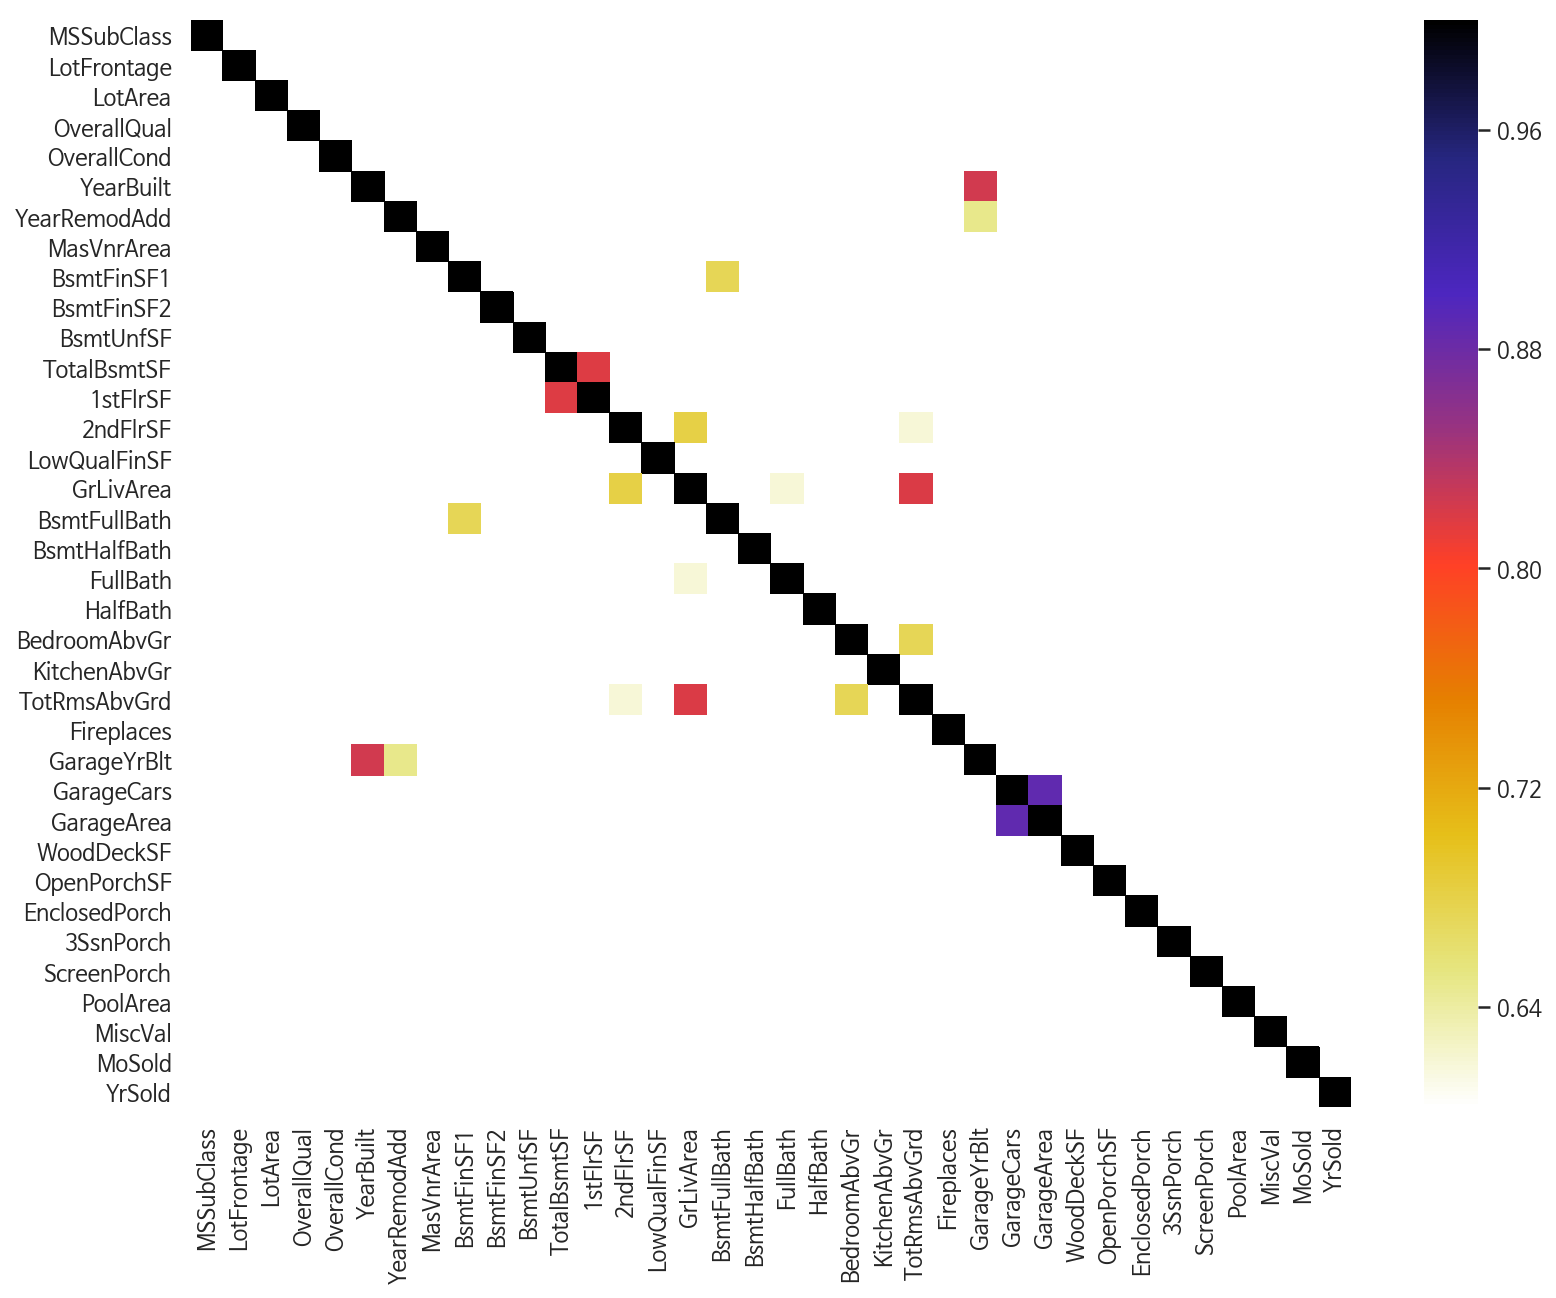

In [26]:
# 숫자형 변수끼리의 전체 상관관계 히트맵
plt.figure(figsize=(13,10))
df_corr = df_train.corr()
df_corr = df_corr.where(df_corr >= 0,   -df_corr) # 음의 상관관계에서도 높은 상관계수를 갖은 데이터를 히트맵으로 보기 위해 음수를 양수로 변경
sns.heatmap(df_corr.where(df_corr > 0.6), cmap="CMRmap_r") # 상관계수가 0.6 이상인 값만 히트맵에 표시

In [27]:
# 상관계수가 높은 조합 리스트
high_corr_list = []
for i in df_corr.columns:
    for j in df_corr.index[df_corr[i] > 0.6]:
        if (i != j) and (not sorted([i,j]) in high_corr_list) :
            high_corr_list.append(sorted([i,j]))
high_corr_list

[['GarageYrBlt', 'YearBuilt'],
 ['GarageYrBlt', 'YearRemodAdd'],
 ['BsmtFinSF1', 'BsmtFullBath'],
 ['1stFlrSF', 'TotalBsmtSF'],
 ['2ndFlrSF', 'GrLivArea'],
 ['2ndFlrSF', 'TotRmsAbvGrd'],
 ['FullBath', 'GrLivArea'],
 ['GrLivArea', 'TotRmsAbvGrd'],
 ['BedroomAbvGr', 'TotRmsAbvGrd'],
 ['GarageCars', 'GarageYrBlt'],
 ['GarageArea', 'GarageCars']]

상관관계 탑10 리스트:  Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'FullBath'],
      dtype='object')


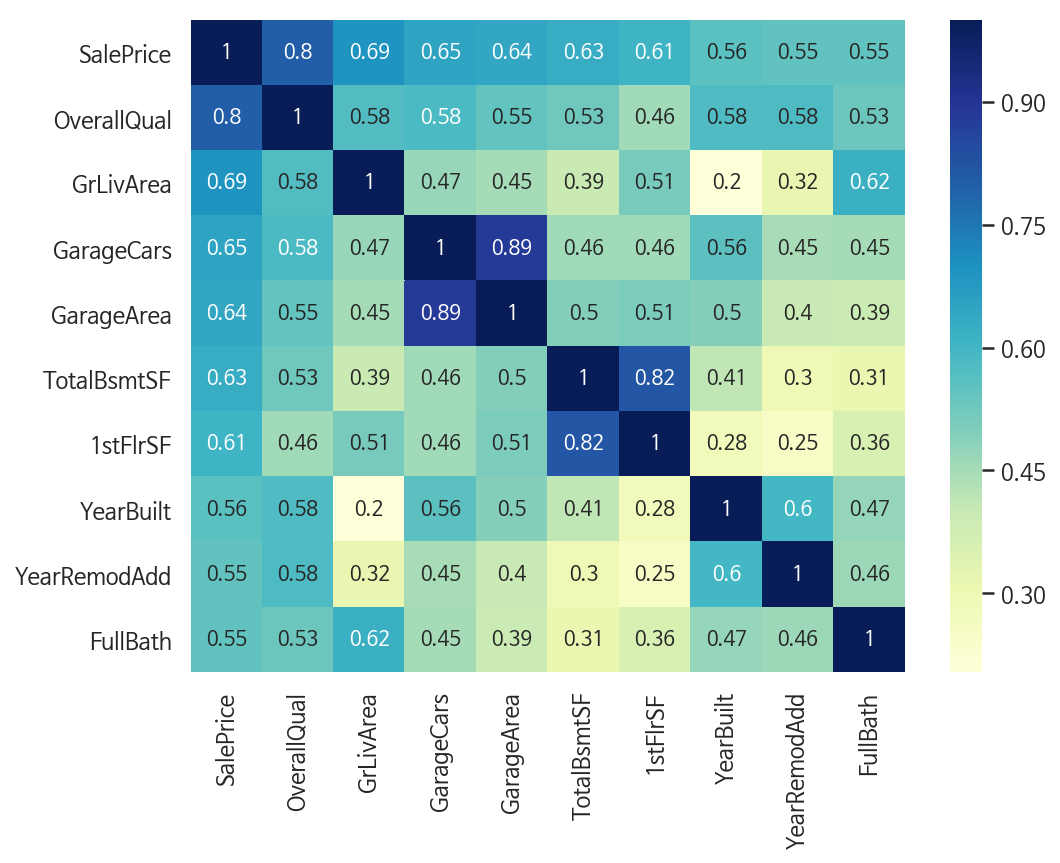

In [30]:
# 'SalePrice' 와 상관관계가 있는 컬럼 상위 10개 분류 
df_train['SalePrice'] = y_train
corrlist = df_train.corr().nlargest(10, 'SalePrice').index
print('상관관계 탑10 리스트: ',corrlist)
plt.figure(figsize=(8,6))
sns.heatmap(df_train[corrlist].corr(), annot=True, cmap="YlGnBu")
df_train.drop('SalePrice', axis=1, inplace=True)

### NaN값 처리

In [31]:
# NA값 있는 컬럼 확인 (19개)
col_null = df_train.count().index[df_train.count() != 1021]
col_null

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [32]:
# 컬럼별 NA값 내용 확인
na_list = df_train[col_null]
na_list

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
869,80.0,NaN,BrkFace,246.0,Gd,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1993.0,Fin,TA,TA,NaN,GdPrv,NaN
1412,60.0,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,FuseF,NaN,Detchd,1956.0,Unf,TA,TA,NaN,NaN,NaN
1234,55.0,NaN,None,0.0,TA,TA,Av,Unf,Unf,FuseA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328,60.0,Grvl,None,0.0,Gd,TA,No,LwQ,Unf,SBrkr,TA,Detchd,1920.0,Unf,Fa,TA,NaN,MnPrv,Shed
622,71.0,NaN,BrkFace,153.0,TA,TA,No,BLQ,Unf,SBrkr,NaN,Detchd,1986.0,Unf,TA,TA,NaN,NaN,NaN
82,78.0,NaN,Stone,468.0,Gd,TA,No,GLQ,Unf,SBrkr,Gd,Attchd,2007.0,RFn,TA,TA,NaN,NaN,NaN
894,64.0,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,SBrkr,NaN,Attchd,1979.0,Unf,TA,TA,NaN,NaN,NaN
1158,92.0,NaN,Stone,186.0,Gd,TA,No,Unf,Unf,SBrkr,NaN,Attchd,2008.0,RFn,TA,TA,NaN,NaN,NaN
597,53.0,NaN,BrkFace,72.0,Ex,TA,Av,Unf,Unf,SBrkr,Gd,Attchd,2006.0,Fin,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [33]:
# NA처리: LotFrontage (도로와 인접한 쪽 집의 폭)

# NA 값을 미 측정치라고 가정하고 상관관계가 있는 다른 컬럼인 LotArea를 이용하여 두 컬럼의 비율을 적용해 NA 예측값을 대입
Lot_col = df_train[['LotFrontage','LotArea']]

# LotArea/LotFrontage 값을 Div 컬럼에 넣음
Lot_col['Div'] = Lot_col['LotArea']/Lot_col['LotFrontage']
Lot_col

,LotFrontage,LotArea,Div
869,80.0,9938,124.225000
1412,60.0,7200,120.000000
1234,55.0,8525,155.000000
1328,60.0,10440,174.000000
622,71.0,7064,99.492958
82,78.0,10206,130.846154
894,64.0,7018,109.656250
1158,92.0,11932,129.695652
597,53.0,3922,74.000000
4,84.0,14260,169.761905


In [34]:
Lot_col['Div'].describe()

count     838.000000
mean      145.630311
std        93.741239
min        26.915033
25%       116.140488
50%       129.837939
75%       150.950000
max      1434.966667
Name: Div, dtype: float64

In [35]:
print('Div값이 500 이상인 개수: ',len(Lot_col['Div'].dropna()[Lot_col['Div'].dropna() >= 500]))
# 500 을 기준으로 그 이상값들을 아웃라이어로 판단하고 제외
Lot_col['Div'].dropna()[Lot_col['Div'].dropna() < 500].describe()

Div값이 500 이상인 개수:  9


count    829.000000
mean     137.778897
std       47.203284
min       26.915033
25%      116.000000
50%      129.744186
75%      150.000000
max      446.608696
Name: Div, dtype: float64

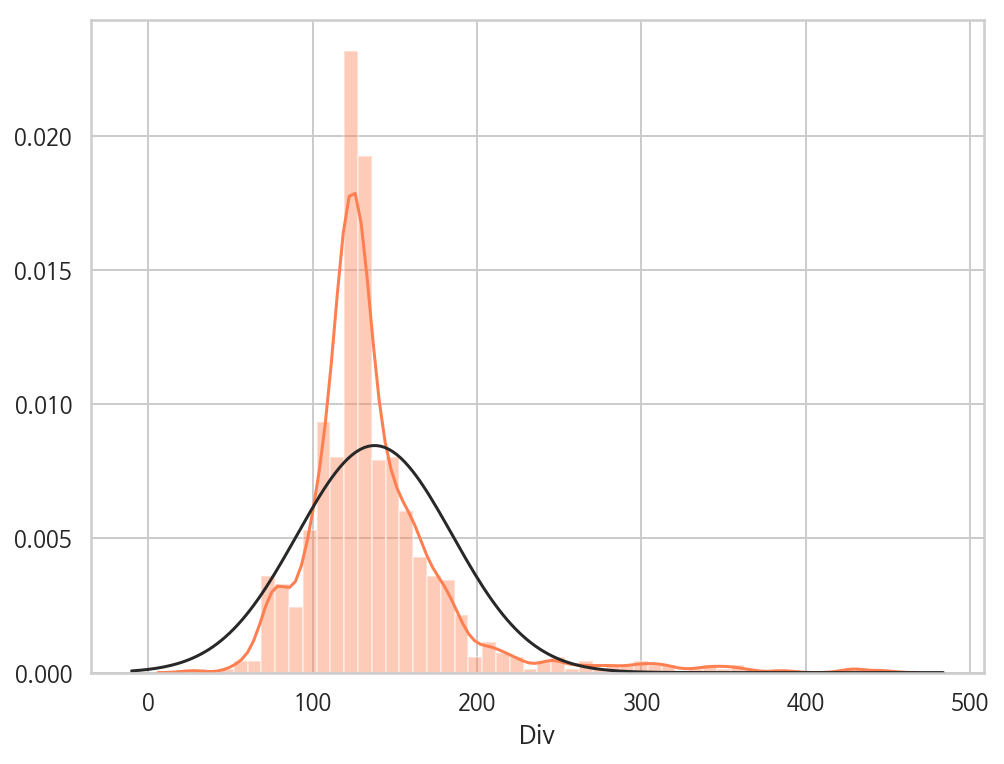

In [36]:
# 아웃라이어를 제외하고 분포그래프로 분포 확인
plt.figure(figsize=(8,6))
sns.distplot(Lot_col['Div'].dropna()[Lot_col['Div'].dropna() < 500], color='coral', fit=norm)

In [37]:
# 분류된 Div컬럼의 평균값을 이용해서 LotFrontage의 NA값을 예측하여 채움
Lot_mean = Lot_col['Div'].dropna()[Lot_col['Div'].dropna() < 500].mean()
na_list['LotFrontage'] = Lot_col['LotFrontage'].fillna(Lot_col['LotArea']/Lot_mean)

print('<처리후 NA 개수>\n',na_list['LotFrontage'].isna().sum())

<처리후 NA 개수>
 0


In [38]:
# NA처리: Alley (현관 들어오는 길 포장타입)
na_col = 'Alley'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값이 의미하는게 들어오는 길 자체가 없는것 이므로 NoAcss로 변경
na_list[na_col] = na_list[na_col].fillna('NoAcss')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Grvl    35
Pave    29
Name: Alley, dtype: int64

<NA 개수>
 957

<처리후 Value 종류>
 NoAcss    957
Grvl       35
Pave       29
Name: Alley, dtype: int64

<처리후 NA 개수>
 0


In [39]:
# NA처리: MasVnrType (골조 벽 덮게 타입) 
na_col = 'MasVnrType'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# 덮게 자체가 없다고 판단하여 None으로 변경
na_list[na_col] = na_list[na_col].fillna('None')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 None       601
BrkFace    310
Stone       94
BrkCmn      11
Name: MasVnrType, dtype: int64

<NA 개수>
 5

<처리후 Value 종류>
 None       606
BrkFace    310
Stone       94
BrkCmn      11
Name: MasVnrType, dtype: int64

<처리후 NA 개수>
 0


In [40]:
# NA처리: MasVnrArea (골조 벽 덮게 넓이) 
na_col = 'MasVnrArea'

print('<NA 개수>\n',na_list[na_col].isna().sum())

# MasVnrType을 None으로 바꿨기때문에 넓이도 0으로 변경
na_list[na_col] = na_list[na_col].fillna(0.0)
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<NA 개수>
 5

<처리후 NA 개수>
 0


In [41]:
# NA처리: BsmtQual (지하실 높이 점수)
na_col = 'BsmtQual'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 TA    461
Gd    424
Ex     86
Fa     26
Name: BsmtQual, dtype: int64

<NA 개수>
 24

<처리후 Value 종류>
 TA        461
Gd        424
Ex         86
Fa         26
NoBsmt     24
Name: BsmtQual, dtype: int64

<처리후 NA 개수>
 0


In [42]:
# NA처리: BsmtCond (지하실 전체적 점수)
na_col = 'BsmtCond'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 TA    912
Gd     49
Fa     34
Po      2
Name: BsmtCond, dtype: int64

<NA 개수>
 24

<처리후 Value 종류>
 TA        912
Gd         49
Fa         34
NoBsmt     24
Po          2
Name: BsmtCond, dtype: int64

<처리후 NA 개수>
 0


In [43]:
# NA처리: BsmtExposure (지하실 창문이 외부로 노출된 정도)
na_col = 'BsmtExposure'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 No    678
Av    149
Gd     98
Mn     72
Name: BsmtExposure, dtype: int64

<NA 개수>
 24

<처리후 Value 종류>
 No        678
Av        149
Gd         98
Mn         72
NoBsmt     24
Name: BsmtExposure, dtype: int64

<처리후 NA 개수>
 0


In [44]:
# NA처리: BsmtFinType1 (지하실 거주 가능 점수)
na_col = 'BsmtFinType1'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Unf    304
GLQ    289
ALQ    156
BLQ    102
Rec     93
LwQ     53
Name: BsmtFinType1, dtype: int64

<NA 개수>
 24

<처리후 Value 종류>
 Unf       304
GLQ       289
ALQ       156
BLQ       102
Rec        93
LwQ        53
NoBsmt     24
Name: BsmtFinType1, dtype: int64

<처리후 NA 개수>
 0


In [45]:
# NA처리: BsmtFinType2 (지하실 거주 가능 점수, 여러 종류일경우)
na_col = 'BsmtFinType2'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Unf    884
Rec     37
LwQ     34
BLQ     19
ALQ     14
GLQ      8
Name: BsmtFinType2, dtype: int64

<NA 개수>
 25

<처리후 Value 종류>
 Unf       884
Rec        37
LwQ        34
NoBsmt     25
BLQ        19
ALQ        14
GLQ         8
Name: BsmtFinType2, dtype: int64

<처리후 NA 개수>
 0


In [46]:
# NA처리: Electrical (전력 시스템 관련)
na_col = 'Electrical'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# 정보를 알수 없기때문에 새로운 카테고리 None 생성
na_list[na_col] = na_list[na_col].fillna('None')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 SBrkr    934
FuseA     62
FuseF     20
FuseP      3
Mix        1
Name: Electrical, dtype: int64

<NA 개수>
 1

<처리후 Value 종류>
 SBrkr    934
FuseA     62
FuseF     20
FuseP      3
Mix        1
None       1
Name: Electrical, dtype: int64

<처리후 NA 개수>
 0


In [47]:
# NA처리: FireplaceQu (벽난로 퀄리티)
na_col = 'FireplaceQu'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 벽난로가 없다는 뜻이므로 NoF로 변경
na_list[na_col] = na_list[na_col].fillna('NoF')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Gd    272
TA    222
Fa     23
Ex     17
Po     12
Name: FireplaceQu, dtype: int64

<NA 개수>
 475

<처리후 Value 종류>
 NoF    475
Gd     272
TA     222
Fa      23
Ex      17
Po      12
Name: FireplaceQu, dtype: int64

<처리후 NA 개수>
 0


In [48]:
# NA처리: GarageType (차고 위치)
na_col = 'GarageType'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Attchd     605
Detchd     276
BuiltIn     64
Basment     13
CarPort      6
2Types       3
Name: GarageType, dtype: int64

<NA 개수>
 54

<처리후 Value 종류>
 Attchd     605
Detchd     276
BuiltIn     64
NoGrage     54
Basment     13
CarPort      6
2Types       3
Name: GarageType, dtype: int64

<처리후 NA 개수>
 0


In [49]:
# NA처리: GarageYrBlt (차고 지어진 년도)
na_col = 'GarageYrBlt'

print('<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<NA 개수>
 54

<처리후 NA 개수>
 0


In [50]:
# NA처리: GarageFinish (차고 내부 인테리어 완성정도)
na_col = 'GarageFinish'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Unf    425
RFn    297
Fin    245
Name: GarageFinish, dtype: int64

<NA 개수>
 54

<처리후 Value 종류>
 Unf        425
RFn        297
Fin        245
NoGrage     54
Name: GarageFinish, dtype: int64

<처리후 NA 개수>
 0


In [51]:
# NA처리: GarageQual (차고 퀄리티)
na_col = 'GarageQual'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 TA    919
Fa     35
Gd      9
Po      3
Ex      1
Name: GarageQual, dtype: int64

<NA 개수>
 54

<처리후 Value 종류>
 TA         919
NoGrage     54
Fa          35
Gd           9
Po           3
Ex           1
Name: GarageQual, dtype: int64

<처리후 NA 개수>
 0


In [52]:
# NA처리: GarageCond (차고 상태)
na_col = 'GarageCond'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 TA    929
Fa     24
Gd      7
Po      6
Ex      1
Name: GarageCond, dtype: int64

<NA 개수>
 54

<처리후 Value 종류>
 TA         929
NoGrage     54
Fa          24
Gd           7
Po           6
Ex           1
Name: GarageCond, dtype: int64

<처리후 NA 개수>
 0


In [53]:
# NA처리: PoolQC (수영장 퀄리티)
na_col = 'PoolQC'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 수영장이 없다는 뜻이므로 NoPool로 변경
na_list[na_col] = na_list[na_col].fillna('NoPool')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Fa    2
Gd    1
Name: PoolQC, dtype: int64

<NA 개수>
 1018

<처리후 Value 종류>
 NoPool    1018
Fa           2
Gd           1
Name: PoolQC, dtype: int64

<처리후 NA 개수>
 0


In [54]:
# NA처리: Fence (울타리 퀄리티)
na_col = 'Fence'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 울타리가 없다는 뜻이므로 NoFnc로 변경
na_list[na_col] = na_list[na_col].fillna('NoFnc')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 MnPrv    116
GdPrv     41
GdWo      29
MnWw       5
Name: Fence, dtype: int64

<NA 개수>
 830

<처리후 Value 종류>
 NoFnc    830
MnPrv    116
GdPrv     41
GdWo      29
MnWw       5
Name: Fence, dtype: int64

<처리후 NA 개수>
 0


In [55]:
# NA처리: MiscFeature (기타 특징들)
na_col = 'MiscFeature'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 기타 특징이 없다는 뜻이므로 Nothing로 변경
na_list[na_col] = na_list[na_col].fillna('Nothing')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Shed    30
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

<NA 개수>
 986

<처리후 Value 종류>
 Nothing    986
Shed        30
Gar2         2
Othr         2
TenC         1
Name: MiscFeature, dtype: int64

<처리후 NA 개수>
 0


In [56]:
# 전체 NA 처리 확인
na_list.isna().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [57]:
# df_train 으로 NA값 정리한 데이터 이동
for i in col_null:
    df_train[i] = na_list[i]
df_train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

### categorical와 quantitative 항목 분류

In [58]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
869,60,RL,80.0,9938,Pave,NoAcss,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,MetalSd,MetalSd,BrkFace,246.0,Gd,TA,PConc,Gd,TA,No,GLQ,750,Unf,0,300,1050,GasA,Ex,Y,SBrkr,1062,887,0,1949,1,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1993,Fin,2,574,TA,TA,Y,156,90,0,0,0,0,NoPool,GdPrv,Nothing,0,6,2010,WD,Normal
1412,90,RL,60.0,7200,Pave,NoAcss,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1949,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0,NoBsmt,0,0,0,Wall,Fa,N,FuseF,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NoF,Detchd,1956,Unf,2,420,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFnc,Nothing,0,6,2009,WD,Normal
1234,70,RH,55.0,8525,Pave,NoAcss,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2Story,5,6,1911,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,Av,Unf,0,Unf,0,940,940,GasA,TA,N,FuseA,1024,940,0,1964,0,0,1,1,4,1,TA,7,Typ,0,NoF,NoGrage,NoGrage,NoGrage,0,0,NoGrage,NoGrage,N,0,192,0,0,0,0,NoPool,NoFnc,Nothing,0,11,2008,WD,Abnorml
1328,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493,Unf,0,1017,1510,GasW,Ex,Y,SBrkr,1584,1208,0,2792,0,0,2,0,5,1,TA,8,Mod,2,TA,Detchd,1920,Unf,2,520,Fa,TA,Y,0,547,0,0,480,0,NoPool,MnPrv,Shed,1150,6,2008,WD,Normal
622,20,RL,71.0,7064,Pave,NoAcss,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1977,1977,Gable,CompShg,Plywood,Plywood,BrkFace,153.0,TA,TA,CBlock,TA,TA,No,BLQ,560,Unf,0,420,980,GasA,TA,Y,SBrkr,980,0,0,980,0,0,1,0,3,1,TA,6,Typ,0,NoF,Detchd,1986,Unf,2,484,TA,TA,Y,192,0,0,0,0,0,NoPool,NoFnc,Nothing,0,7,2009,WD,Normal


In [59]:
col_cat = []
col_quan = []
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        col_cat.append(i)
    else:
        col_quan.append(i)
# 범주형 컬럼 개수
print(len(col_cat))
# 숫자형 컬럼 개수
print(len(col_quan))
    

44
35


### 각 컬럼별 분석 및 수정

In [60]:
df_train[col_quan]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
869,60,80.000000,9938,7,5,1993,1994,246.0,750,0,300,1050,1062,887,0,1949,1,0,2,1,3,1,8,1,2,574,156,90,0,0,0,0,0,6,2010
1412,90,60.000000,7200,4,5,1949,1950,0.0,0,0,0,0,1040,0,0,1040,0,0,2,0,2,2,6,0,2,420,0,0,0,0,0,0,0,6,2009
1234,70,55.000000,8525,5,6,1911,1950,0.0,0,0,940,940,1024,940,0,1964,0,0,1,1,4,1,7,0,0,0,0,192,0,0,0,0,0,11,2008
1328,50,60.000000,10440,6,7,1920,1950,0.0,493,0,1017,1510,1584,1208,0,2792,0,0,2,0,5,1,8,2,2,520,0,547,0,0,480,0,1150,6,2008
622,20,71.000000,7064,5,6,1977,1977,153.0,560,0,420,980,980,0,0,980,0,0,1,0,3,1,6,0,2,484,192,0,0,0,0,0,0,7,2009
82,20,78.000000,10206,8,5,2007,2007,468.0,33,0,1530,1563,1563,0,0,1563,0,0,2,0,3,1,6,1,3,758,144,99,0,0,0,0,0,10,2008
894,90,64.000000,7018,5,5,1979,1979,0.0,0,0,0,0,1535,0,0,1535,0,0,2,0,4,2,8,0,2,400,0,0,0,0,0,0,0,6,2009
1158,20,92.000000,11932,8,5,2007,2008,186.0,0,0,1580,1580,1580,0,0,1580,0,0,2,0,3,1,7,0,3,830,0,24,0,0,0,0,0,6,2008
597,120,53.000000,3922,7,5,2006,2007,72.0,0,0,1258,1258,1402,0,0,1402,0,2,0,2,2,1,7,1,3,648,120,16,0,0,0,0,0,2,2007
4,60,84.000000,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008


In [61]:
# MSSubClass : 주거 타입 (범주형으로 수정하기)
'''
        20	1-STORY 1946 & NEWER ALL STYLES -> S1NEW
        30	1-STORY 1945 & OLDER -> S1OLD
        40	1-STORY W/FINISHED ATTIC ALL AGES -> S1FA
        45	1-1/2 STORY - UNFINISHED ALL AGES -> S1hUFA
        50	1-1/2 STORY FINISHED ALL AGES -> S1hFA
        60	2-STORY 1946 & NEWER -> S2NEW
        70	2-STORY 1945 & OLDER -> S2OLD
        75	2-1/2 STORY ALL AGES -> S2h
        80	SPLIT OR MULTI-LEVEL -> SML
        85	SPLIT FOYER -> SF
        90	DUPLEX - ALL STYLES AND AGES -> DPL
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER -> S1PNEW
       150	1-1/2 STORY PUD - ALL AGES -> S1hSP
       160	2-STORY PUD - 1946 & NEWER -> S2PNEW
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER -> PMI
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES -> F2
'''

df_train['MSSubClass'] = np.select([df_train['MSSubClass']==20,
                                   df_train['MSSubClass']==30,df_train['MSSubClass']==40,
                                   df_train['MSSubClass']==45,df_train['MSSubClass']==50,
                                   df_train['MSSubClass']==60,df_train['MSSubClass']==70,
                                   df_train['MSSubClass']==75,df_train['MSSubClass']==80,
                                   df_train['MSSubClass']==85,df_train['MSSubClass']==90,
                                   df_train['MSSubClass']==120,df_train['MSSubClass']==150,
                                   df_train['MSSubClass']==160,df_train['MSSubClass']==180,
                                   df_train['MSSubClass']==190,], ['S1NEW', 'S1OLD', 'S1FA', 'S1hUFA', 'S1hFA', 'S2NEW', 'S2OLD',
                                                                    'S2h', 'SML', 'SF', 'DPL', 'S1PNEW', 'S1hSP', 'S2PNEW', 'PMI', 'F2'])
col_cat.append(col_quan.pop(0))
df_train[col_cat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
869,RL,Pave,NoAcss,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,1993,Fin,TA,TA,Y,NoPool,GdPrv,Nothing,WD,Normal,S2NEW
1412,RL,Pave,NoAcss,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,Gable,CompShg,BrkFace,Stone,None,TA,TA,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NoBsmt,Wall,Fa,N,FuseF,TA,Typ,NoF,Detchd,1956,Unf,TA,TA,Y,NoPool,NoFnc,Nothing,WD,Normal,DPL
1234,RH,Pave,NoAcss,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,PConc,TA,TA,Av,Unf,Unf,GasA,TA,N,FuseA,TA,Typ,NoF,NoGrage,NoGrage,NoGrage,NoGrage,NoGrage,N,NoPool,NoFnc,Nothing,WD,Abnorml,S2OLD
1328,RM,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Sdng,None,Gd,Gd,BrkTil,Gd,TA,No,LwQ,Unf,GasW,Ex,Y,SBrkr,TA,Mod,TA,Detchd,1920,Unf,Fa,TA,Y,NoPool,MnPrv,Shed,WD,Normal,S1hFA
622,RL,Pave,NoAcss,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NoF,Detchd,1986,Unf,TA,TA,Y,NoPool,NoFnc,Nothing,WD,Normal,S1NEW


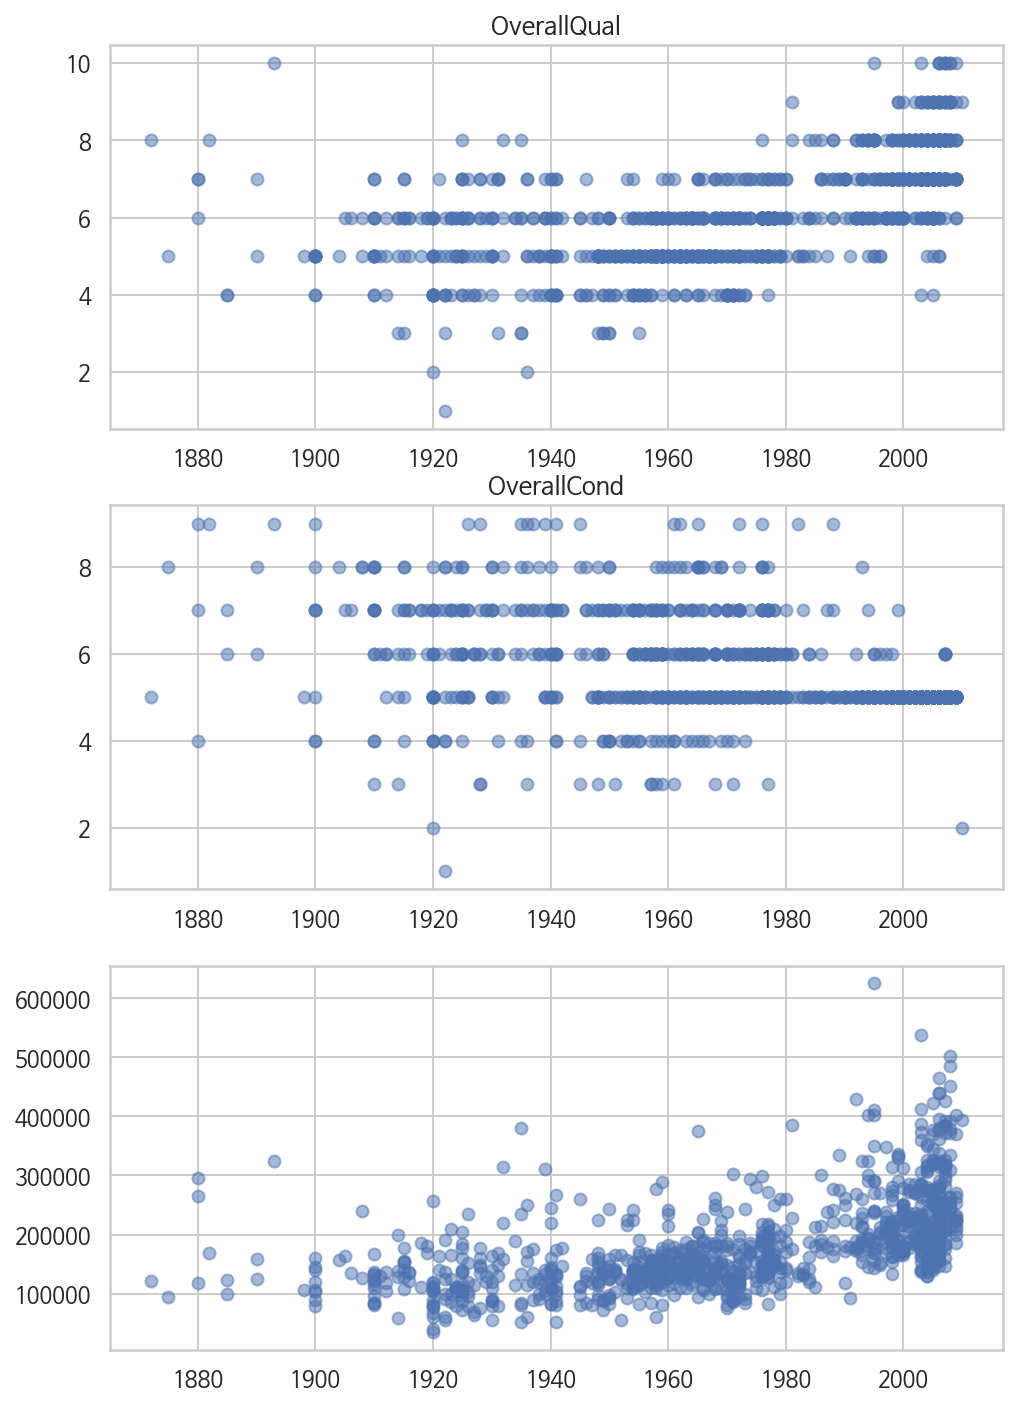

In [63]:
# OverallQual, OverallCond, YearBuilt, YearRemodAdd
plt.figure(figsize=(8,12))
ax1 = plt.subplot(3,1,1)
ax1.scatter(x=df_train['YearBuilt'], y=df_train['OverallQual'], alpha=0.5)
ax1.set_title('OverallQual')
ax2 = plt.subplot(3,1,2)
ax2.scatter(x=df_train['YearBuilt'], y=df_train['OverallCond'], alpha=0.5)
ax2.set_title('OverallCond')
ax3 = plt.subplot(3,1,3)
ax3.scatter(x=df_train['YearBuilt'], y=y_train, alpha=0.5)

(array([139.,  20.,  25.,  30.,  30.,  30.,  35.,  36.,  29.,  43.,  18.,
         15.,  19.,  22.,  35.,  68.,  89.,  70., 162., 106.]),
 array([1950., 1953., 1956., 1959., 1962., 1965., 1968., 1971., 1974.,
        1977., 1980., 1983., 1986., 1989., 1992., 1995., 1998., 2001.,
        2004., 2007., 2010.]),
 <a list of 20 Patch objects>)

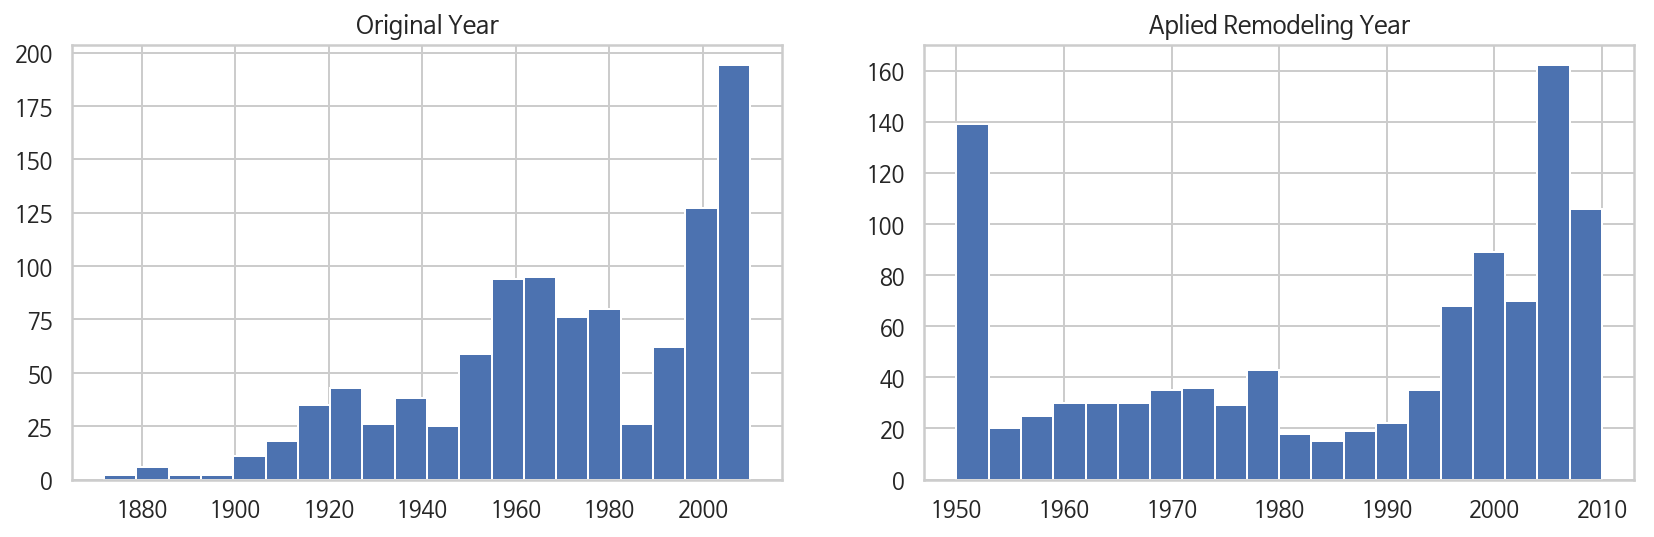

In [64]:
plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
ax1.set_title('Original Year')
ax1.hist(df_train['YearBuilt'],bins=20)
ax2 = plt.subplot(122)
ax2.set_title('Aplied Remodeling Year')
ax2.hist(df_train['YearRemodAdd'],bins=20)

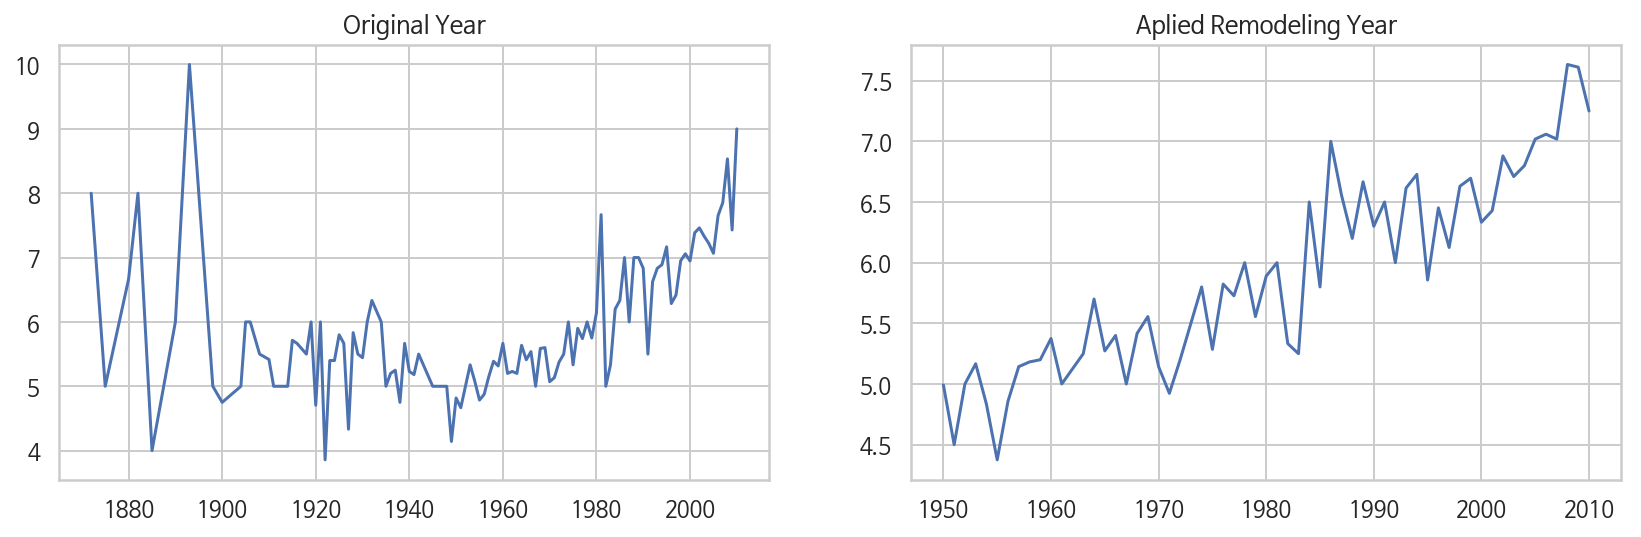

In [65]:
# 1950년 전으로는 데이터 양이 적고 이상치 때문에 평균값 그래프가 일정하지 않음
# 1950년 이후로는 최신 지어진 집 일수록 평점이 높은 경향이 있음
# 리모델링 연식으로 그래프를 그려보면 최신식 일 수록 평점이 높아지는 것을 볼 수 있음
plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
ax1.set_title('Original Year')
ax1.plot(df_train.groupby('YearBuilt')['OverallQual'].mean())
ax2 = plt.subplot(122)
ax2.set_title('Aplied Remodeling Year')
ax2.plot(df_train.groupby('YearRemodAdd')['OverallQual'].mean())

In [66]:
# 리모델링 연식으로 구하는식이 좀 더 적합하고 오리지날 연식도 포함 하므로 오리지날 연식 데이터를 제외
df_train = df_train.drop('YearBuilt', axis=1)
len(df_train.columns)

78

In [67]:
# MasVnrType이 None(없음)인데 MasVnrArea 값이 존재하는 행 검색
df_train[df_train['MasVnrType'] == 'None'][['MasVnrType','MasVnrArea']][df_train[df_train['MasVnrType'] == 'None']['MasVnrArea']!=0]

,MasVnrType,MasVnrArea
1230,None,1.0
773,None,1.0
1334,None,312.0
1300,None,344.0
624,None,288.0


In [69]:
# 검색된 값을 0으로 변환
MVT_index = df_train[df_train['MasVnrType'] == 'None'][['MasVnrType','MasVnrArea']][df_train[df_train['MasVnrType'] == 'None']['MasVnrArea']!=0].index
df_train.loc[MVT_index,'MasVnrArea'] = 0.0

In [70]:
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF
# 전체 지하실 넓이를 나타내는 TotalBsmtSF만 남기고 분석에서 제외
df_train = df_train.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1)
len(df_train.columns)

75

In [71]:
# 1stFlrSF, 2ndFlrSF, GrLivArea
# 층별 넓이를 나눠서 나타내주는것이 적합하다고 판단하여 GrLivArea 컬럼을 제외
df_train = df_train.drop(['GrLivArea'], axis=1)
len(df_train.columns)

74

In [72]:
# 컬럼이름이 숫자로 시작하는 컬럼 이름을 영문으로 시작하도록 변경
df_train.rename(columns={'1stFlrSF':'FstFlrSF','2ndFlrSF':'SndFlrSF'}, inplace=True)

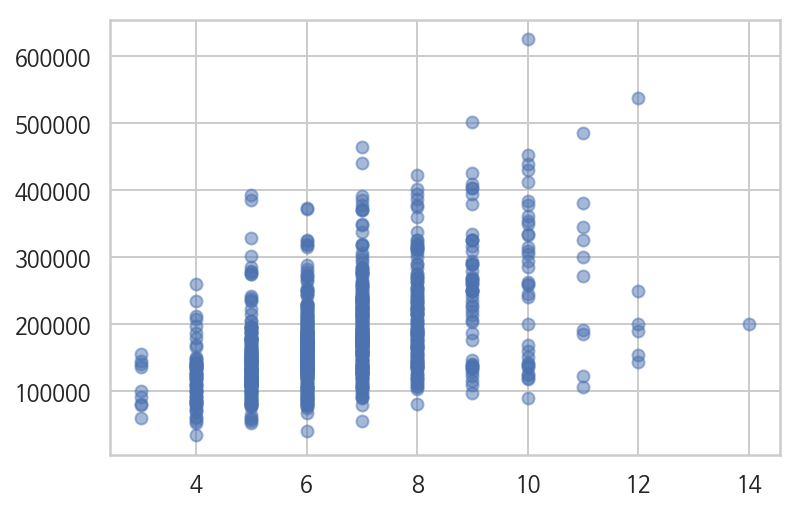

In [73]:
# TotRmsAbvGrd
# 지상에 있는 방 개수별 SalePrice 분포 확인
plt.scatter(x=df_train['TotRmsAbvGrd'], y=y_train, alpha=0.5)

In [74]:
# 다중공선성 문제 가능성
df_origin[['GrLivArea','TotRmsAbvGrd']].corr()

,GrLivArea,TotRmsAbvGrd
GrLivArea,1.000000,0.825489
TotRmsAbvGrd,0.825489,1.000000


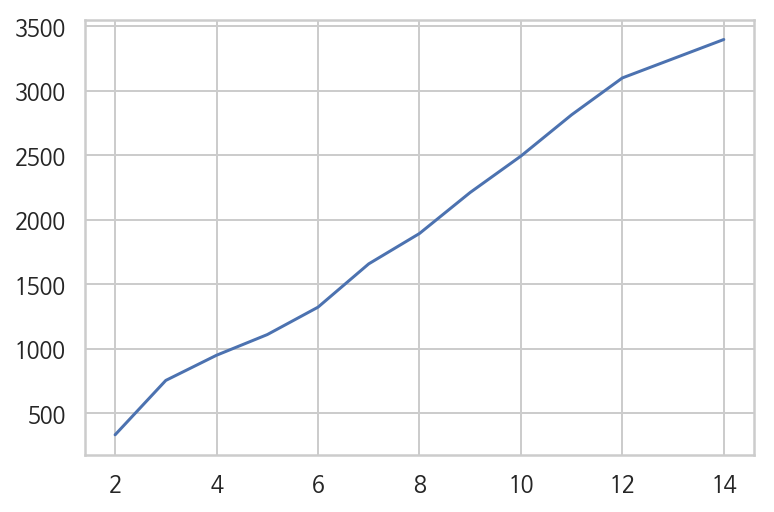

In [75]:
plt.plot(df_origin.groupby('TotRmsAbvGrd')[['GrLivArea']].mean())

In [76]:
# OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch (처마, 지붕같이)
# Porch 컬럼 생성 (단순하게 Porch가 있는지 없는지 여부)
df_train['Porch'] = np.where(((df_train['OpenPorchSF'] !=0) | (df_train['EnclosedPorch'] !=0) | (df_train['3SsnPorch']!=0) | (df_train['ScreenPorch'] != 0)), 1, 0)

In [77]:
df_train[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch' ,'ScreenPorch','Porch']].head()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Porch
869,90,0,0,0,1
1412,0,0,0,0,0
1234,192,0,0,0,1
1328,547,0,0,480,1
622,0,0,0,0,0


In [78]:
# Porch 외의 컬럼 제외
df_train.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch' ,'ScreenPorch'], axis=1, inplace=True)

In [80]:
# MoSold 컬럼을 두자리 표현으로 바꾸기
df_train['MoSold'] = np.where(df_train['MoSold'].astype(int) < 10, '0'+df_train['MoSold'].astype(str), df_train['MoSold'].astype(str))

In [81]:
# 년도와 월을 합친 컬럼 YrMo 생성
df_train['YrMo'] = df_train['YrSold'].map(str) + df_train['MoSold']

In [82]:
df_train[['YrMo','YrSold', 'MoSold']].head()

,YrMo,YrSold,MoSold
869,201006,2010,06
1412,200906,2009,06
1234,200811,2008,11
1328,200806,2008,06
622,200907,2009,07


In [83]:
# YrMo 데이터를 정수형으로 변경
df_train['YrMo'] = df_train['YrMo'].astype(int)

In [84]:
# 'YrSold', 'MoSold' 컬럼 분석에서 제외
df_train.drop(['YrSold', 'MoSold'], axis=1, inplace= True)

### categorical와 quantitative 재분류

In [86]:
len(df_train.columns)

70

In [88]:
col_cat = []
col_quan = []
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        col_cat.append(i)
    else:
        col_quan.append(i)

In [89]:
df_train[col_cat].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
869,S2NEW,RL,Pave,NoAcss,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,1993,Fin,TA,TA,Y,NoPool,GdPrv,Nothing,WD,Normal
1412,DPL,RL,Pave,NoAcss,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,Gable,CompShg,BrkFace,Stone,None,TA,TA,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NoBsmt,Wall,Fa,N,FuseF,TA,Typ,NoF,Detchd,1956,Unf,TA,TA,Y,NoPool,NoFnc,Nothing,WD,Normal
1234,S2OLD,RH,Pave,NoAcss,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,PConc,TA,TA,Av,Unf,Unf,GasA,TA,N,FuseA,TA,Typ,NoF,NoGrage,NoGrage,NoGrage,NoGrage,NoGrage,N,NoPool,NoFnc,Nothing,WD,Abnorml
1328,S1hFA,RM,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Sdng,None,Gd,Gd,BrkTil,Gd,TA,No,LwQ,Unf,GasW,Ex,Y,SBrkr,TA,Mod,TA,Detchd,1920,Unf,Fa,TA,Y,NoPool,MnPrv,Shed,WD,Normal
622,S1NEW,RL,Pave,NoAcss,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NoF,Detchd,1986,Unf,TA,TA,Y,NoPool,NoFnc,Nothing,WD,Normal


In [90]:
# GarageYrBlt 컬럼의 NA값을 0을로 바꾸고 타입을 Int로 한후 연속형 변수로 변환
df_train['GarageYrBlt'] = np.where(df_train['GarageYrBlt'] == 'NoGrage', 0, df_train['GarageYrBlt'])
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].astype(int)
col_cat.remove('GarageYrBlt')
col_quan.append('GarageYrBlt')

In [91]:
df_train[col_quan].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,TotalBsmtSF,FstFlrSF,SndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,PoolArea,MiscVal,Porch,YrMo,GarageYrBlt
869,80.0,9938,7,5,1994,246.0,1050,1062,887,0,1,0,2,1,3,1,8,1,2,574,156,0,0,1,201006,1993
1412,60.0,7200,4,5,1950,0.0,0,1040,0,0,0,0,2,0,2,2,6,0,2,420,0,0,0,0,200906,1956
1234,55.0,8525,5,6,1950,0.0,940,1024,940,0,0,0,1,1,4,1,7,0,0,0,0,0,0,1,200811,0
1328,60.0,10440,6,7,1950,0.0,1510,1584,1208,0,0,0,2,0,5,1,8,2,2,520,0,0,1150,1,200806,1920
622,71.0,7064,5,6,1977,153.0,980,980,0,0,0,0,1,0,3,1,6,0,2,484,192,0,0,0,200907,1986


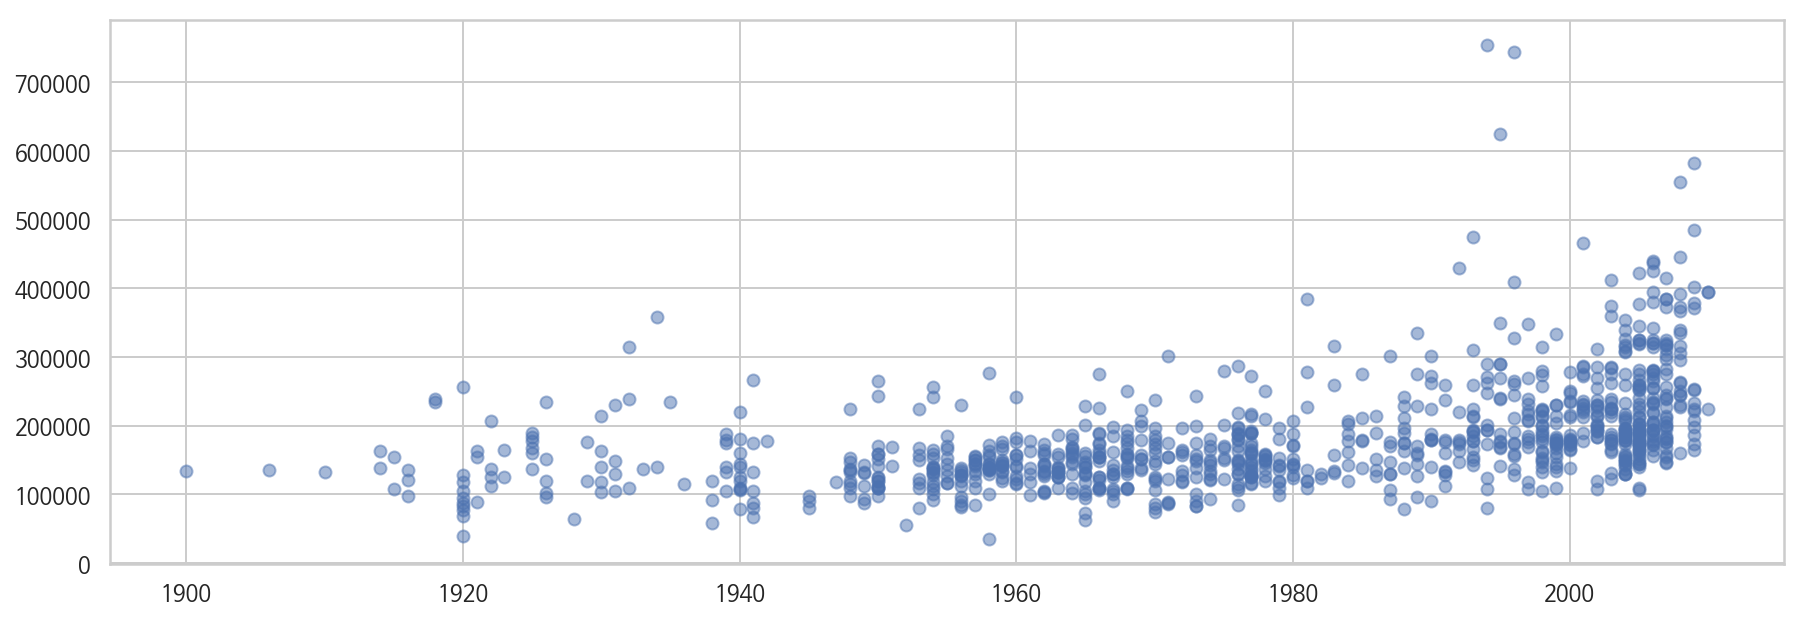

In [285]:
plt.figure(figsize=(15,5))
plt.scatter(x=df_train['GarageYrBlt'][df_train['GarageYrBlt']>1750], y=df_train['SalePrice'][df_train['GarageYrBlt']>1750], alpha=0.5)

### OLS 회기분석

In [299]:
X = sm.add_constant(df_train[col_quan])
result_quan = sm.OLS(df_train['SalePrice'],X).fit()
print(result_quan.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     136.8
Date:                Tue, 06 Aug 2019   Prob (F-statistic):          1.13e-306
Time:                        15:29:13   Log-Likelihood:                -12175.
No. Observations:                1021   AIC:                         2.440e+04
Df Residuals:                     994   BIC:                         2.454e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.603e+05    1.8e+06      0.312   

In [300]:
# 예측값 비교
# df_test.head()
ypred = result_quan.predict(X)
predict_df = pd.DataFrame(ypred)
predict_df = predict_df.rename(columns = {0:"predict"})
predict_df['SalePrice'] = pd.DataFrame(df_train["SalePrice"])
predict_df.tail()

,predict,SalePrice
700,301425.268587,312500
636,28973.074991,60000
405,167952.272970,150000
40,165414.869524,160000
1428,123581.114144,119000


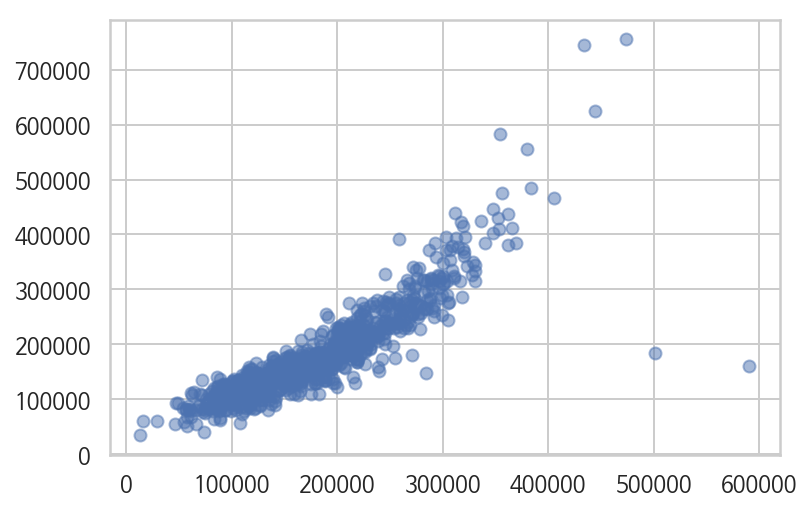

In [302]:
plt.scatter(x=predict_df['predict'][predict_df['predict']>0], y=predict_df['SalePrice'][predict_df['predict']>0],alpha=0.5)

In [304]:
predict_df[(predict_df['predict']>500000) & (predict_df['SalePrice']<200000)]

,predict,SalePrice
523,501227.343254,184750
1298,590712.635721,160000


In [309]:
# 아웃라이어
df_train.loc[[523,1298,691,1182]]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FstFlrSF,SndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Porch,YrMo
523,S2NEW,RL,130.0,40094,Pave,NoAcss,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,Unf,3138,GasA,Ex,Y,SBrkr,3138,1538,0,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007,Fin,3,884,TA,TA,Y,208,0,NoPool,NoFnc,Nothing,0,New,Partial,184750,1,200710
1298,S2NEW,RL,313.0,63887,Pave,NoAcss,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,Unf,6110,GasA,Ex,Y,SBrkr,4692,950,0,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008,Fin,2,1418,TA,TA,Y,214,480,Gd,NoFnc,Nothing,0,New,Partial,160000,1,200801
691,S2NEW,RL,104.0,21535,Pave,NoAcss,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,Unf,2444,GasA,Ex,Y,SBrkr,2444,1872,0,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994,Fin,3,832,TA,TA,Y,382,0,NoPool,NoFnc,Nothing,0,WD,Normal,755000,1,200701
1182,S2NEW,RL,160.0,15623,Pave,NoAcss,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,2396,GasA,Ex,Y,SBrkr,2411,2065,0,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996,Fin,3,813,TA,TA,Y,171,555,Ex,MnPrv,Nothing,0,WD,Abnorml,745000,1,200707
